In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.cluster import DBSCAN
import pickle
import time
from sklearn.linear_model import LinearRegression

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_data(filename):
    a_file = open(filename, "rb")
    output = pickle.load(a_file)
    a_file.close()
    
    return output

def save_data(filename, data):
    a_file = open(filename, "wb")
    pickle.dump(data, a_file)
    a_file.close()

In [3]:
train_data = load_data('Processed_Data/train_set.pkl')
test_data = load_data('Processed_Data/test_set.pkl')

In [4]:
input_dim = 30
X_lat = []
Y_lat = []
X_long = []
Y_long = []
for i, traj in enumerate(train_data):
    lat = traj[0]
    long = traj[1]
    
    if len(lat) > 2 * input_dim:
        for i in range(len(lat) - input_dim):
            X_lat.append(lat[i:i+input_dim])
            Y_lat.append(lat[i+input_dim])
            
            X_long.append(long[i:i+input_dim])
            Y_long.append(long[i+input_dim])

In [5]:
X_lat = np.array(X_lat)
Y_lat = np.array(Y_lat)
X_long = np.array(X_long)
Y_long = np.array(Y_long)
print(X_lat.shape, Y_lat.shape)

(2898332, 30) (2898332,)


In [70]:
reg_lat = LinearRegression().fit(X_lat, Y_lat )
reg_long = LinearRegression().fit(X_long, Y_long )

In [71]:
ratios = []
for k, traj in enumerate(test_data):
    if k % 100 == 0:
        print(k)
    lat = traj[0]
    long = traj[1]
    pred_lat = []
    pred_long = []
    
    if len(lat) > input_dim + 2:
        
        #predicting latitude
        X = np.array(lat[:input_dim]).reshape(1,-1)
        for i in range(len(lat) - input_dim):
            pred_lat.append(reg_lat.predict(X)[0])
            X = list(np.squeeze(X, axis = 0))[1:] + [pred_lat[-1]]
            X = np.array(X).reshape(1,-1)
            
        #predicting latitude
        X = np.array(long[:input_dim]).reshape(1,-1)
        for i in range(len(long) - input_dim):
            pred_long.append(reg_long.predict(X)[0])
            X = list(np.squeeze(X, axis = 0))[1:] + [pred_long[-1]]
            X = np.array(X).reshape(1,-1)
            
            
        Y_lat = np.array(lat[input_dim:])
        Y_long = np.array(long[input_dim:])
        pred_lat = np.array(pred_lat)
        pred_long = np.array(pred_long)
        
        lat_diff = np.sum(np.abs(np.diff(Y_lat)))
        long_diff = np.sum(np.abs(np.diff(Y_long)))
        path_len = lat_diff + long_diff
        
        error = (np.sum(np.abs(Y_lat - pred_lat)) + np.sum(np.abs(Y_long - pred_long)))**0.5
        
        ratios.append(error/path_len)
        if error < path_len:
            print('Error:', error, 'Path Len:', path_len)
            plt.figure()
            plt.plot(Y_lat, Y_long, 'r')
            plt.plot(pred_lat, pred_long, 'k')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


Text(0.5, 1.0, 'Context = 20')

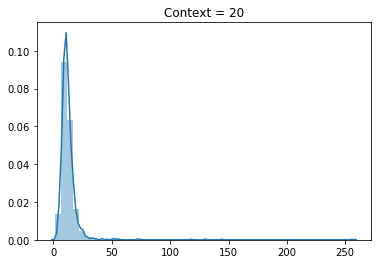

In [72]:
sns.distplot(ratios)

In [73]:
print(np.mean(np.array(ratios)), np.std(np.array(ratios)))

12.704253238197378 10.600712892078784


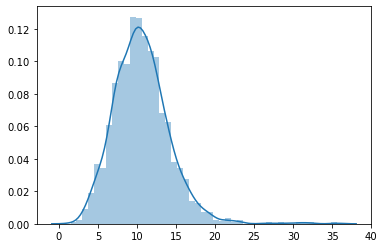

In [59]:
sns.distplot(ratios)

In [60]:
print(np.mean(np.array(ratios)), np.std(np.array(ratios)))

10.581852924522103 3.545724557784073


In [10]:
def handle_timeInput_data(X, Y, lat, long, time, N):
    
    for i in range(len(lat)-N):
        X.append(time[i:i+N] + [1])
        Y.append([lat[i+N], long[i+N]])
        
    return X, Y   

def create_model(X, Y):
    X = np.array(X)
    X = X.T
    Y = np.array(Y)
    Y = Y.T

    A = Y @ (np.linalg.pinv(X))    
    
    return A

In [11]:
N = 20 # dimension of the ML model

X = []
Y = []

for traj in train_set:
    if len(traj[0]) > N:
        lat = traj[0]
        long = traj[1]
        datetime = traj[2]
        time = [(t-datetime[0]).seconds for t in datetime]
        
        X, Y = handle_data(X, Y, lat, long, time, N)
        
A = create_model(X, Y)

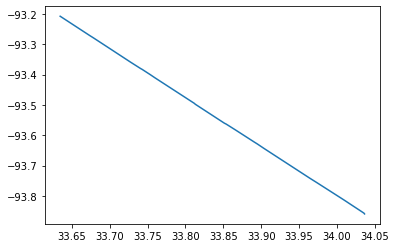

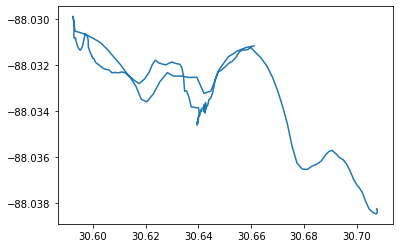

In [14]:
for traj in test_set:
    if len(traj[0]) > N:
        lat = traj[0]
        long = traj[1]
        datetime = traj[2]
        time = [(t-datetime[0]).seconds for t in datetime]
        
        test_data(A, lat, long, time)
        
    break

In [12]:
def test_data(A, lat, long, time):
    
    inputs = []
    labels = []
    for i in range(len(lat)-N):
        inputs.append(time[i:i+N] + [1])
        labels.append([lat[i+N], long[i+N]])
                      
    inputs = np.array(inputs).T
    labels = np.array(labels).T
                      
    outputs = A@inputs
    
    plt.figure()
    plt.plot(outputs[0,:], outputs[1,:])
    plt.figure()
    plt.plot(labels[0,:], labels[1,:])
    #error = np.sum(np.square(outputs-labels), axis = 0)
    #print(error.shape)
    

In [15]:
###POSITION BASED MODEL

In [ ]:
def handle_positionInput_data(X, Y, lat, long, N):
    
    for i in range(len(lat)-N):
        X.append(time[i:i+N] + [1])
        Y.append([lat[i+N], long[i+N]])
        
    return X, Y   

def create_model(X, Y):
    X = np.array(X)
    X = X.T
    Y = np.array(Y)
    Y = Y.T

    A = Y @ (np.linalg.pinv(X))    
    
    return A

In [ ]:
N = 20 # dimension of the ML model

X = []
Y = []

for traj in train_set:
    if len(traj[0]) > N:
        lat = traj[0]
        long = traj[1]
        datetime = traj[2]
        time = [(t-datetime[0]).seconds for t in datetime]
        
        X, Y = handle_data(X, Y, lat, long, time, N)
        
A = create_model(X, Y)